<a href="https://colab.research.google.com/github/shyamagarwal13/HackDavis2022/blob/main/nlp_research_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"


import nltk
import numpy as np
import matplotlib.pyplot as plt
nltk.download('stopwords') 
nltk.download('wordnet')
import pandas as pd
import seaborn as sns

data = pd.read_csv('Replication_scored.csv')

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\matplotlib\__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\Rayum Shahed\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\Rayum Shahed\anaconda3\lib\site-packages\matplotlib\__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\Rayum Shahed\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\Rayum Shahed\anaconda3\lib\site-packages\matplotlib\__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. 

In [ ]:
import os
import pandas as pd
import string
import nltk
# nltk.download()

'''==========================================================================='''
''' loading the data'''



data.columns
data.head(n=20)
data.Score_replication.unique()

# What is the shape of the dataset?
print("Input data has {} rows and {} columns".format(len(data), len(data.columns)))

# Analyse the labels distribution
data.Score_replication.value_counts()
print("Out of {} rows, {} are class 1, {} are class 2, {} are class 3".format(len(data),
                                                                    len(data[data['Score_replication']==1]),
                                                                    len(data[data['Score_replication']==2]), 
                                                                    len(data[data['Score_replication']==3])))

'''==========================================================================='''
''' data cleaning '''
# How much missing data is there?
print("\nNumber of null in label: {}".format(data['Score_replication'].isnull().sum()))
print("Number of null in text: {}".format(data['Replication'].isnull().sum()))


'''==========================================================================='''
'''Remove punctuation'''
string.punctuation

#Function to remove Punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct

data['body_text_clean'] = data['Replication'].apply(lambda x: remove_punct(x))
data.head()


'''==========================================================================='''
''' Tokenization '''
import re

# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower())) 
#We convert to lower as Python is case-sensitive. 
data.head()


'''==========================================================================='''
''' Remove stopwords '''

'''NOTE: we need stopwords for this project. Removing stopwords like "not"  will change the meaning
of the students' responses ("not" affect vs affect).'''
'''
stopword = nltk.corpus.stopwords.words('english')# All English Stopwords
stopword = [x for x in stopword if x not in ('not', 'no', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 
                                             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 
                                             'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', 
                                             "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren',
                                             "weren't", 'won', "won't", 'wouldn', "wouldn't")]
print(stopword)

# # Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword] # To remove all stopwords
    return text

data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()
'''

'''==========================================================================='''
''' Preprocessing Data: Using Stemming '''

ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['body_text_stemmed'] = data['body_text_tokenized'].apply(lambda x: stemming(x))

data.head()


'''==========================================================================='''
''' Preprocessing Data: Using a Lemmatizer 

Lemmatizing derives the canonical form (‘lemma’) of a word. i.e the root form. 
It is better than stemming as it uses a dictionary-based approach i.e a morphological analysis 
to the root word.eg: Entitling, Entitled->Entitle

'''

wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['body_text_lemmatized'] = data['body_text_tokenized'].apply(lambda x: lemmatizing(x))

data['body_text_lemmatized'].head(10)


'''==========================================================================='''
''' Saving the cleaned Data'''




'''==========================================================================='''
''' Vectorizing Data: Bag-of-Words

any order of the words in the document is discarded
it only tells us weather word is present in the document or not
'''

# Function to remove punctuation, tokenize, and stem
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens]
    return text

# apply countVectorizer


'''==========================================================================='''
''' Apply TfidfVectorizer '''


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text_clean'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())


X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
X_tfidf_df.head(10)

print(X_tfidf_df.loc[(X_tfidf_df!=0).any(axis=1)])


'''==========================================================================='''
''' Saving the vectorized Data'''

# We save the file as CSV 
# CSV(Comma-separated-value), It is easier to read compared to tsv(Tab-separated-value) and can be opened on Excel.
data_vectorized = {}
data_vectorized['tfidf'] = X_tfidf_df
data_vectorized['label'] = data['Score_replication']




C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:52: DeprecationWarning: invalid escape sequence \W
<>:134: DeprecationWarning: invalid escape sequence \W
<>:52: DeprecationWarning: invalid escape sequence \W
<>:134: DeprecationWarning: invalid escape sequence \W
<ipython-input-2-5509aa2e33cc>:52: DeprecationWarning: invalid escape sequence \W
  tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
<ipython-input-2-5509aa2e33cc>:134: DeprecationWarning: invalid escape sequence \W
  tokens = re.split('\W+', text)


Input data has 1031 rows and 2 columns
Out of 1031 rows, 502 are class 1, 195 are class 2, 334 are class 3

Number of null in label: 0
Number of null in text: 0
(1031, 869)
['', '100', '3', '3ttacttaccttcggacttcct5', '3ttacttactctcggacttcct', '4', '5', '5aatgaatgagagcctgaagga', '5so', '5to3', '9', 'a', 'aag', 'aat', 'aatgaa', 'aatgaatgagagcctgaagga', 'aatgaatgg', 'aatgaatgggagcctgaagga', 'aau', 'abil', 'abl', 'abnorm', 'abnormalti', 'abort', 'about', 'abov', 'absent', 'accord', 'acid', 'across', 'action', 'activ', 'actual', 'ad', 'adapt', 'add', 'addit', 'adenin', 'advers', 'affect', 'after', 'again', 'all', 'allel', 'allow', 'almost', 'also', 'alter', 'altern', 'alway', 'am', 'amino', 'amount', 'an', 'and', 'ani', 'anoth', 'anticip', 'anticodon', 'anymor', 'anyth', 'apoptosi', 'apparatu', 'are', 'area', 'arginin', 'aris', 'around', 'as', 'asparagin', 'assign', 'assum', 'asterik', 'asterisk', 'asteriskstop', 'astrict', 'at', 'attatch', 'au', 'aug', 'automat', 'bace', 'back', 'bad', 'ba

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Rayum Shahed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
newData = pd.read_csv('export_dataframe.csv')

print(newData.loc[newData['Repl_Cons_Code'] == 0])

newData = newData[newData['Repl_Cons_Code'].isin([1,2,3])]
newData['body_text_clean'] = newData['Repl_Response'].apply(lambda x: remove_punct(x))
newData = newData.rename(columns={'Repl_Response': 'Replication', 'Repl_Cons_Code': 'Score_replication'})
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(newData['body_text_clean'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())


newData_vectorized = {}
newData_vectorized['tfidf'] = X_tfidf_df
newData_vectorized['label'] = newData['Score_replication']

                                         Repl_Response  Repl_Cons_Code
108                                                IDK               0
343  I'm not really sure what a base change is so I...               0


C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frames = [data, newData]
combined = pd.concat(frames)

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(combined['body_text_clean'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

combinedData_vectorized = {}
combinedData_vectorized['tfidf'] = X_tfidf_df
combinedData_vectorized['label'] = combined['Score_replication']

x_train = combinedData_vectorized['tfidf'][:-394]
y_train = combinedData_vectorized['label'][:-394]
x_test = combinedData_vectorized['tfidf'][-394:]
y_test = combinedData_vectorized['label'][-394:]

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from nltk.corpus import movie_reviews, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, decomposition
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


X_train, X_test, y_train, y_test = train_test_split(data_vectorized['tfidf'], data_vectorized['label'], test_size=0.3, random_state=123 ) 

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import optuna as op

def objective(trial):
    penalty=trial.suggest_categorical('penalty',['l1', 'l2'])
    loss=trial.suggest_categorical('loss',['log', 'hinge', 'modified_huber', 'squared_hinge', 'perceptron'])
    alpha=trial.suggest_float("alpha",1e-4,1e3,log=True)
    sgd_clf = SGDClassifier(loss=loss, penalty=penalty, alpha=alpha)
    sgd_clf.fit(X_train,y_train)
    predictions_SGD = sgd_clf.predict(X_test)
    accuracy = (f1_score(y_test, predictions_SGD, average='weighted'))
    return accuracy

study = op.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
trial=study.best_trial
print("Best Tuning Parameters : {} \n with f1 of : {:.2f} %".format(trial.params,trial.value))



C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[I 2021-12-01 23:42:41,192] A new study created in memory with name: no-name-8555d73d-2624-4004-aa77-49fcec325a24
[I 2021-12-01 23:42:41,265] Trial 0 finished with value: 0.3333333333333333 and parameters: {'penalty': 'l1', 'loss': 'modified_huber', 'alpha': 19.077732576137173}. Best is trial 0 with value: 0.3333333333333333.
[I 2021-12-01 23:42:41,309] Trial 1 finished with value: 0.04480286738351254 and parameters: {'penalty': 'l1', 'loss': 'perceptron', 'alpha': 1.8780457454644206}. Best is trial 0 with value: 0.3333333333333333.
[I 2021-12-01 23:42:41,354] Trial 2 finished with value: 0.04480286738351254 and parameters: {'penalty': 'l1', 'loss': 'per

[I 2021-12-01 23:42:44,066] Trial 34 finished with value: 0.8123901867950878 and parameters: {'penalty': 'l1', 'loss': 'perceptron', 'alpha': 0.0006015052162287952}. Best is trial 15 with value: 0.8496022478470295.
[I 2021-12-01 23:42:44,120] Trial 35 finished with value: 0.8319050097743882 and parameters: {'penalty': 'l2', 'loss': 'modified_huber', 'alpha': 0.0025057707114617953}. Best is trial 15 with value: 0.8496022478470295.
[I 2021-12-01 23:42:44,186] Trial 36 finished with value: 0.6952108966340804 and parameters: {'penalty': 'l1', 'loss': 'modified_huber', 'alpha': 0.014918439028959198}. Best is trial 15 with value: 0.8496022478470295.
[I 2021-12-01 23:42:44,221] Trial 37 finished with value: 0.3333333333333333 and parameters: {'penalty': 'l2', 'loss': 'log', 'alpha': 0.23857434688990048}. Best is trial 15 with value: 0.8496022478470295.
[I 2021-12-01 23:42:44,261] Trial 38 finished with value: 0.814045665932929 and parameters: {'penalty': 'l2', 'loss': 'perceptron', 'alpha': 0

[I 2021-12-01 23:42:49,584] Trial 69 finished with value: 0.8311662531017369 and parameters: {'penalty': 'l2', 'loss': 'modified_huber', 'alpha': 0.000109144304245574}. Best is trial 15 with value: 0.8496022478470295.
[I 2021-12-01 23:42:49,615] Trial 70 finished with value: 0.8303928204229539 and parameters: {'penalty': 'l2', 'loss': 'perceptron', 'alpha': 0.006744552541252177}. Best is trial 15 with value: 0.8496022478470295.
[I 2021-12-01 23:42:49,681] Trial 71 finished with value: 0.833109486546406 and parameters: {'penalty': 'l2', 'loss': 'modified_huber', 'alpha': 0.00418329233307711}. Best is trial 15 with value: 0.8496022478470295.
[I 2021-12-01 23:42:49,729] Trial 72 finished with value: 0.8412903225806452 and parameters: {'penalty': 'l2', 'loss': 'modified_huber', 'alpha': 0.0022070029479959448}. Best is trial 15 with value: 0.8496022478470295.
[I 2021-12-01 23:42:49,782] Trial 73 finished with value: 0.8221602706065737 and parameters: {'penalty': 'l2', 'loss': 'modified_hube

Best Tuning Parameters : {'penalty': 'l2', 'loss': 'modified_huber', 'alpha': 0.0013553627159278013} 
 with f1 of : 0.85 %


In [ ]:
bestSGD = SGDClassifier(loss = trial.params['loss'], alpha = trial.params['alpha'], penalty = trial.params['penalty'] )
bestSGD.fit(X_train,y_train)
predictions_SGD = bestSGD.predict(X_test)
print(confusion_matrix(y_test, predictions_SGD))
print(classification_report(y_test, predictions_SGD))

[[144   8   3]
 [ 14  31   5]
 [  7   9  89]]
              precision    recall  f1-score   support

           1       0.87      0.93      0.90       155
           2       0.65      0.62      0.63        50
           3       0.92      0.85      0.88       105

    accuracy                           0.85       310
   macro avg       0.81      0.80      0.80       310
weighted avg       0.85      0.85      0.85       310



C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
v = op.visualization.plot_slice(study)
v.update_layout(
    title="alpha=.0002        loss=modified_huber    penalty=l1",
    font=dict(
        size=20
    )
)
v.show()

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
op.visualization.plot_optimization_history(study)

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = int(trial.suggest_loguniform('max_depth', 10, 200))
    criterion = trial.suggest_categorical('criterion',['gini', 'entropy'])
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion)
    rf.fit(X_train,y_train)
    predictions_RF = rf.predict(X_test)
    accuracy = (f1_score(y_test, predictions_RF, average='weighted'))
    return accuracy

study = op.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
trial=study.best_trial
print("Best Tuning Parameters : {} \n with f1 of : {:.2f} %".format(trial.params,trial.value))

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[I 2021-12-01 23:36:57,509] A new study created in memory with name: no-name-ebcffd4e-9d56-4980-8a57-c3d493db389b
[I 2021-12-01 23:36:57,955] Trial 0 finished with value: 0.7959571688954261 and parameters: {'n_estimators': 306, 'max_depth': 11.128424598709941, 'criterion': 'gini'}. Best is trial 0 with value: 0.7959571688954261.
[I 2021-12-01 23:36:58,250] Trial 1 finished with value: 0.783564749883123 and parameters: {'n_estimators': 208, 'max_depth': 10.848139213811322, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7959571688954261.
[I 2021-12-01 23:36:58,902] Trial 2 finished with value: 0.8239683703393381 and parameters: {'n_estimators': 384

[I 2021-12-01 23:37:17,466] Trial 34 finished with value: 0.827752118615362 and parameters: {'n_estimators': 350, 'max_depth': 54.9808515467053, 'criterion': 'entropy'}. Best is trial 14 with value: 0.8443904931986144.
[I 2021-12-01 23:37:18,127] Trial 35 finished with value: 0.8211460933977427 and parameters: {'n_estimators': 345, 'max_depth': 54.44271943640674, 'criterion': 'entropy'}. Best is trial 14 with value: 0.8443904931986144.
[I 2021-12-01 23:37:18,838] Trial 36 finished with value: 0.8118057200177997 and parameters: {'n_estimators': 358, 'max_depth': 110.90972317132751, 'criterion': 'entropy'}. Best is trial 14 with value: 0.8443904931986144.
[I 2021-12-01 23:37:19,447] Trial 37 finished with value: 0.8254619779016865 and parameters: {'n_estimators': 313, 'max_depth': 56.45667051278697, 'criterion': 'entropy'}. Best is trial 14 with value: 0.8443904931986144.
[I 2021-12-01 23:37:20,227] Trial 38 finished with value: 0.8239400960766686 and parameters: {'n_estimators': 397, 'm

[I 2021-12-01 23:37:38,089] Trial 70 finished with value: 0.8109731202424557 and parameters: {'n_estimators': 234, 'max_depth': 94.76416108396724, 'criterion': 'entropy'}. Best is trial 14 with value: 0.8443904931986144.
[I 2021-12-01 23:37:38,738] Trial 71 finished with value: 0.8350211795373085 and parameters: {'n_estimators': 356, 'max_depth': 139.21898538856536, 'criterion': 'gini'}. Best is trial 14 with value: 0.8443904931986144.
[I 2021-12-01 23:37:39,342] Trial 72 finished with value: 0.8092865162107228 and parameters: {'n_estimators': 341, 'max_depth': 148.36000857714288, 'criterion': 'gini'}. Best is trial 14 with value: 0.8443904931986144.
[I 2021-12-01 23:37:39,974] Trial 73 finished with value: 0.8251000382357758 and parameters: {'n_estimators': 357, 'max_depth': 162.94093627722893, 'criterion': 'gini'}. Best is trial 14 with value: 0.8443904931986144.
[I 2021-12-01 23:37:40,690] Trial 74 finished with value: 0.8182935810699495 and parameters: {'n_estimators': 408, 'max_de

Best Tuning Parameters : {'n_estimators': 316, 'max_depth': 94.65832252979085, 'criterion': 'gini'} 
 with f1 of : 0.84 %


In [ ]:
bestRF = RandomForestClassifier(n_estimators = trial.params['n_estimators'], max_depth = trial.params['max_depth'], criterion = trial.params['criterion'] )
bestRF.fit(X_train,y_train)
predictions_RF = bestRF.predict(X_test)
print(confusion_matrix(y_test, predictions_RF))
print(classification_report(y_test, predictions_RF))

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[[144   4   7]
 [ 16  27   7]
 [ 20   6  79]]
              precision    recall  f1-score   support

           1       0.80      0.93      0.86       155
           2       0.73      0.54      0.62        50
           3       0.85      0.75      0.80       105

    accuracy                           0.81       310
   macro avg       0.79      0.74      0.76       310
weighted avg       0.81      0.81      0.80       310



In [ ]:
v = op.visualization.plot_slice(study)
v.update_layout(
    title="criterion=.gini        max_depth=94    n_estimators=316",
    font=dict(
        size=20
    )
)
v.show()

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
op.visualization.plot_optimization_history(study)

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import optuna as op
def objective(trial):
    kernel=trial.suggest_categorical('kernel',['rbf','poly','linear','sigmoid'])
    c=trial.suggest_float("C",0.1,3.0,log=True)
    gamma=trial.suggest_categorical('gamma',['auto','scale'])
    degree=trial.suggest_int("degree",1,4,log=True)
    svc =svm.SVC(kernel=kernel,degree=degree,gamma=gamma,C=c)
    svc.fit(X_train,y_train)
    predictions_SVC = svc.predict(X_test)
    accuracy = (f1_score(y_test, predictions_SVC, average='weighted'))
    return accuracy

study = op.create_study(direction="maximize")
study.optimize(objective, n_trials=100,n_jobs=-1)
trial=study.best_trial
print("Best Tuning Parameters : {} \n with f1 of : {:.2f} %".format(trial.params,trial.value))

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[I 2021-12-02 15:05:31,948] A new study created in memory with name: no-name-f50041d1-2e97-428a-ac94-704c882abc8f
C:\Users\Rayum Shahed\anaconda3\lib\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(
[I 2021-12-02 15:05:32,245] Trial 3 finished with value: 0.8266729865865097 and parameters: {'kernel': 'poly', 'C': 0.5222229126536264, 'gamma': 'scale', 'degree': 1}. Best is trial 3 with value: 0.8266729865865097.
[I 2021-12-02 15:05:32,259] Trial 4 finished with

[I 2021-12-02 15:05:32,960] Trial 33 finished with value: 0.836884458613004 and parameters: {'kernel': 'linear', 'C': 1.7470717526207478, 'gamma': 'scale', 'degree': 3}. Best is trial 22 with value: 0.8476928252786479.
[I 2021-12-02 15:05:33,006] Trial 34 finished with value: 0.8388582912574208 and parameters: {'kernel': 'linear', 'C': 1.0652414857710935, 'gamma': 'auto', 'degree': 2}. Best is trial 22 with value: 0.8476928252786479.
[I 2021-12-02 15:05:33,152] Trial 36 finished with value: 0.850929509655842 and parameters: {'kernel': 'poly', 'C': 2.930757411225512, 'gamma': 'scale', 'degree': 2}. Best is trial 36 with value: 0.850929509655842.
[I 2021-12-02 15:05:33,154] Trial 35 finished with value: 0.8547899323621228 and parameters: {'kernel': 'poly', 'C': 2.391120932749482, 'gamma': 'scale', 'degree': 2}. Best is trial 35 with value: 0.8547899323621228.
[I 2021-12-02 15:05:33,155] Trial 37 finished with value: 0.8291502753737213 and parameters: {'kernel': 'poly', 'C': 0.77285256352

[I 2021-12-02 15:05:34,218] Trial 67 finished with value: 0.8445701575505677 and parameters: {'kernel': 'rbf', 'C': 2.1042872420007455, 'gamma': 'scale', 'degree': 3}. Best is trial 35 with value: 0.8547899323621228.
[I 2021-12-02 15:05:34,289] Trial 70 finished with value: 0.8471732221561733 and parameters: {'kernel': 'rbf', 'C': 1.9430263967811539, 'gamma': 'scale', 'degree': 3}. Best is trial 35 with value: 0.8547899323621228.
[I 2021-12-02 15:05:34,302] Trial 71 finished with value: 0.8474948995166139 and parameters: {'kernel': 'rbf', 'C': 1.9571885081187634, 'gamma': 'scale', 'degree': 3}. Best is trial 35 with value: 0.8547899323621228.
[I 2021-12-02 15:05:34,310] Trial 73 finished with value: 0.8476928252786479 and parameters: {'kernel': 'poly', 'C': 1.9740333805198627, 'gamma': 'scale', 'degree': 2}. Best is trial 35 with value: 0.8547899323621228.
[I 2021-12-02 15:05:34,357] Trial 72 finished with value: 0.8471732221561733 and parameters: {'kernel': 'rbf', 'C': 1.9101755872433

Best Tuning Parameters : {'kernel': 'poly', 'C': 2.391120932749482, 'gamma': 'scale', 'degree': 2} 
 with f1 of : 0.85 %


In [ ]:
bestSVC = svm.SVC(kernel = trial.params['kernel'], degree = trial.params['degree'], gamma = trial.params['gamma'], C = trial.params['C'] )
bestSVC.fit(X_train,y_train)
predictions_SVC = bestSVC.predict(X_test)
print(confusion_matrix(y_test, predictions_SVC))
print(classification_report(y_test, predictions_SVC))

[[145   7   3]
 [ 14  29   7]
 [  6   7  92]]
              precision    recall  f1-score   support

           1       0.88      0.94      0.91       155
           2       0.67      0.58      0.62        50
           3       0.90      0.88      0.89       105

    accuracy                           0.86       310
   macro avg       0.82      0.80      0.81       310
weighted avg       0.85      0.86      0.85       310



C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
v = op.visualization.plot_slice(study)
v.update_layout(
    title="kernel=poly              C=2.75          gamma=scale         degree=2",
    font=dict(
        size=20
    )
)
v.show()

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



    number     value             datetime_start          datetime_complete  \
0        0  0.451250 2021-12-02 15:05:31.950031 2021-12-02 15:05:32.434490   
1        1  0.333333 2021-12-02 15:05:31.952032 2021-12-02 15:05:32.303352   
2        2  0.666144 2021-12-02 15:05:31.953033 2021-12-02 15:05:32.383443   
3        3  0.826673 2021-12-02 15:05:31.955035 2021-12-02 15:05:32.244300   
4        4  0.786337 2021-12-02 15:05:31.966045 2021-12-02 15:05:32.259313   
..     ...       ...                        ...                        ...   
95      95  0.854790 2021-12-02 15:05:34.685665 2021-12-02 15:05:35.005955   
96      96  0.854790 2021-12-02 15:05:34.698677 2021-12-02 15:05:35.025974   
97      97  0.854790 2021-12-02 15:05:34.711689 2021-12-02 15:05:35.020969   
98      98  0.854790 2021-12-02 15:05:34.731707 2021-12-02 15:05:35.021970   
99      99  0.854790 2021-12-02 15:05:34.743718 2021-12-02 15:05:35.027975   

                 duration  params_C  params_degree params_gamma

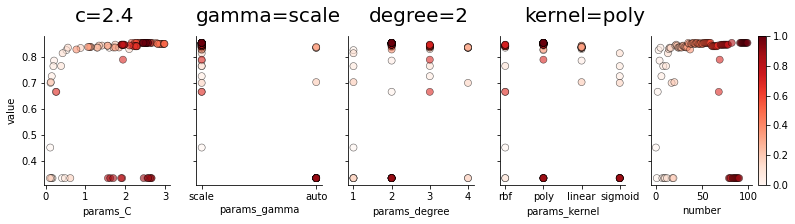

In [ ]:
best_params = study.best_params  # Get best parameters for the objective function.
best_objective = study.best_value  # Get best objective value.
best_trial = study.best_trial  # Get best trial's information.
all_info = study.trials  # Get all trials' information.

trials_dataframe = ('number',
                    'value',
                    'params',
                    'datetime_start',
                    'datetime_complete',
                    'state',
                    'user_attrs',
                    'system_attrs')
df = study.trials_dataframe()
c = 'Reds'
params = [ 'params_C','params_gamma', 'params_degree','params_kernel', 'number']
grid = sns.pairplot(diag_kind = None, data=df, hue='number', y_vars='value', x_vars=params,  palette = c,
                    plot_kws = {'alpha': 0.6, 's': 50, 'edgecolor': 'k'},
                    height = 2)
norm = plt.Normalize(df['value'].min(), df['value'].max())
sm = plt.cm.ScalarMappable(cmap='Reds')
sm.set_array([])
grid._legend.remove()
grid.fig.colorbar(sm)
grid.fig.set_size_inches(12,3)
grid.fig.text(0.1, 1.02,'c=2.4', fontsize=20)
grid.fig.text(0.24, 1.02,'gamma=scale', fontsize=20)
grid.fig.text(0.44, 1.02,'degree=2', fontsize=20)
grid.fig.text(0.62, 1.02,'kernel=poly', fontsize=20)
print(df)

In [ ]:
v=op.visualization.plot_optimization_history(study)

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
def objective(trial):
    penalty=trial.suggest_categorical('penalty',['l1','l2'])
    loss=trial.suggest_categorical('loss',['squared_hinge'])
    c=trial.suggest_float("C",0.1,3.0,log=True)
    lSVC =LinearSVC(penalty=penalty ,loss=loss,C=c,dual=False)
    lSVC.fit(X_train,y_train)
    predictions_SVM = lSVC.predict(X_test)
    accuracy = (f1_score(y_test, predictions_SVM, average='weighted'))
    return accuracy

study = op.create_study(direction="maximize")
study.optimize(objective, n_trials=100,n_jobs=-1)
trial=study.best_trial
print("Best Tuning Parameters : {} \n with f1 of : {:.2f} %".format(trial.params,trial.value))

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[I 2021-12-01 19:07:48,974] A new study created in memory with name: no-name-72b81ec5-c68c-42c4-8ea5-b63aa95ac8ff
C:\Users\Rayum Shahed\anaconda3\lib\site-packages\optuna\study\study.py:393: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

[I 2021-12-01 19:07:49,077] Trial 1 finished with value: 0.8419131167212578 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 0.5546539888762638}. Best is trial 1 with value: 0.8419131167212578.
[I 2021-12-01 19:07:49,104] Trial 0 finished with value: 0.8416760742680085 and parameters: {'pena

[I 2021-12-01 19:07:49,593] Trial 33 finished with value: 0.8485969754470704 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 1.272999740496138}. Best is trial 19 with value: 0.8518039378322546.
[I 2021-12-01 19:07:49,629] Trial 35 finished with value: 0.8487272803217454 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 1.3170025058990902}. Best is trial 19 with value: 0.8518039378322546.
[I 2021-12-01 19:07:49,636] Trial 36 finished with value: 0.8451570501877773 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 1.3430934664361445}. Best is trial 19 with value: 0.8518039378322546.
[I 2021-12-01 19:07:49,637] Trial 37 finished with value: 0.8487272803217454 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 1.3145408893997401}. Best is trial 19 with value: 0.8518039378322546.
[I 2021-12-01 19:07:49,638] Trial 38 finished with value: 0.8487272803217454 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 1.31999099509633

[I 2021-12-01 19:07:50,235] Trial 70 finished with value: 0.8485969754470704 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 1.107044954506754}. Best is trial 19 with value: 0.8518039378322546.
[I 2021-12-01 19:07:50,242] Trial 72 finished with value: 0.8415524193548388 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 1.5365407253120065}. Best is trial 19 with value: 0.8518039378322546.
[I 2021-12-01 19:07:50,250] Trial 73 finished with value: 0.8415524193548388 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 1.5072370794147008}. Best is trial 19 with value: 0.8518039378322546.
[I 2021-12-01 19:07:50,288] Trial 74 finished with value: 0.8415524193548388 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 1.531166144249703}. Best is trial 19 with value: 0.8518039378322546.
[I 2021-12-01 19:07:50,308] Trial 75 finished with value: 0.8451570501877773 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 1.462183274202262

Best Tuning Parameters : {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 0.9862602289192662} 
 with f1 of : 0.85 %


In [ ]:
bestlSVC = LinearSVC(penalty = trial.params['penalty'], loss = trial.params['loss'], C = trial.params['C'], dual=False )
bestlSVC.fit(X_train,y_train)
predictions_SVM = bestlSVC.predict(X_test)
print(confusion_matrix(y_test, predictions_SVM))
print(classification_report(y_test, predictions_SVM))

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[[145   8   2]
 [ 13  33   4]
 [  8  11  86]]
              precision    recall  f1-score   support

           1       0.87      0.94      0.90       155
           2       0.63      0.66      0.65        50
           3       0.93      0.82      0.87       105

    accuracy                           0.85       310
   macro avg       0.81      0.80      0.81       310
weighted avg       0.86      0.85      0.85       310



In [ ]:
op.visualization.plot_slice(study)

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
op.visualization.plot_optimization_history(study)

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
def objective(trial):
    alpha=trial.suggest_float("alpha",1e-4,1e3,log=True)
    fit_prior=trial.suggest_categorical('fit_prior',[True, False])
    mnb =MultinomialNB(alpha=alpha, fit_prior=fit_prior)
    mnb.fit(X_train,y_train)
    predictions_mnb = mnb.predict(X_test)
    accuracy = (f1_score(y_test, predictions_mnb, average='weighted'))
    return accuracy

study = op.create_study(direction="maximize")
study.optimize(objective, n_trials=100,n_jobs=-1)
trial=study.best_trial
print("Best Tuning Parameters : {} \n with f1 of : {:.2f} %".format(trial.params,trial.value))

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[I 2021-12-01 22:50:02,561] A new study created in memory with name: no-name-a5e7eb11-6a85-4bac-8242-05a091c878de
C:\Users\Rayum Shahed\anaconda3\lib\site-packages\optuna\study\study.py:393: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

[I 2021-12-01 22:50:02,683] Trial 0 finished with value: 0.5203746376502302 and parameters: {'alpha': 851.0882183236104, 'fit_prior': False}. Best is trial 0 with value: 0.5203746376502302.
[I 2021-12-01 22:50:02,705] Trial 1 finished with value: 0.7782443995943864 and parameters: {'alpha': 0.0007716982625

[I 2021-12-01 22:50:03,295] Trial 38 finished with value: 0.8230333429770615 and parameters: {'alpha': 0.08397022981190445, 'fit_prior': False}. Best is trial 8 with value: 0.8230333429770615.
[I 2021-12-01 22:50:03,296] Trial 41 finished with value: 0.8167896638523097 and parameters: {'alpha': 0.07165685407692018, 'fit_prior': False}. Best is trial 8 with value: 0.8230333429770615.
[I 2021-12-01 22:50:03,296] Trial 37 finished with value: 0.819314553628443 and parameters: {'alpha': 0.0631594592588581, 'fit_prior': False}. Best is trial 8 with value: 0.8230333429770615.
[I 2021-12-01 22:50:03,303] Trial 39 finished with value: 0.8196594470176177 and parameters: {'alpha': 0.07398421441837869, 'fit_prior': False}. Best is trial 8 with value: 0.8230333429770615.
[I 2021-12-01 22:50:03,317] Trial 40 finished with value: 0.8196594470176177 and parameters: {'alpha': 0.07782468021028272, 'fit_prior': False}. Best is trial 8 with value: 0.8230333429770615.
[I 2021-12-01 22:50:03,359] Trial 43 

[I 2021-12-01 22:50:04,028] Trial 77 finished with value: 0.8074760233035945 and parameters: {'alpha': 0.03478935052014413, 'fit_prior': False}. Best is trial 57 with value: 0.8263917604880272.
[I 2021-12-01 22:50:04,043] Trial 80 finished with value: 0.8074760233035945 and parameters: {'alpha': 0.0329133701277138, 'fit_prior': False}. Best is trial 57 with value: 0.8263917604880272.
[I 2021-12-01 22:50:04,044] Trial 78 finished with value: 0.7975664968873798 and parameters: {'alpha': 0.028264898895332107, 'fit_prior': False}. Best is trial 57 with value: 0.8263917604880272.
[I 2021-12-01 22:50:04,046] Trial 79 finished with value: 0.8074760233035945 and parameters: {'alpha': 0.035355547727339585, 'fit_prior': False}. Best is trial 57 with value: 0.8263917604880272.
[I 2021-12-01 22:50:04,099] Trial 81 finished with value: 0.8074760233035945 and parameters: {'alpha': 0.03770475778111326, 'fit_prior': False}. Best is trial 57 with value: 0.8263917604880272.
[I 2021-12-01 22:50:04,118] T

Best Tuning Parameters : {'alpha': 0.1892408310071685, 'fit_prior': True} 
 with f1 of : 0.83 %


In [ ]:
bestmnb = MultinomialNB(alpha = trial.params['alpha'], fit_prior = trial.params['fit_prior'] )
bestmnb.fit(X_train,y_train)
predictions_mnb = bestmnb.predict(X_test)
print(confusion_matrix(y_test, predictions_mnb))
print(classification_report(y_test, predictions_mnb))

[[147   6   2]
 [ 16  23  11]
 [ 11   5  89]]
              precision    recall  f1-score   support

           1       0.84      0.95      0.89       155
           2       0.68      0.46      0.55        50
           3       0.87      0.85      0.86       105

    accuracy                           0.84       310
   macro avg       0.80      0.75      0.77       310
weighted avg       0.83      0.84      0.83       310



C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
v = op.visualization.plot_slice(study)
v.update_layout(
    title="Plot Title                   d",
    font=dict(
        size=20
    )
)
v.show()

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
v=op.visualization.plot_optimization_history(study)
v.show()

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



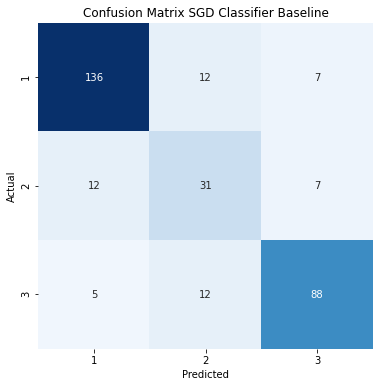

              precision    recall  f1-score   support

           1       0.89      0.88      0.88       155
           2       0.56      0.62      0.59        50
           3       0.86      0.84      0.85       105

    accuracy                           0.82       310
   macro avg       0.77      0.78      0.77       310
weighted avg       0.83      0.82      0.82       310



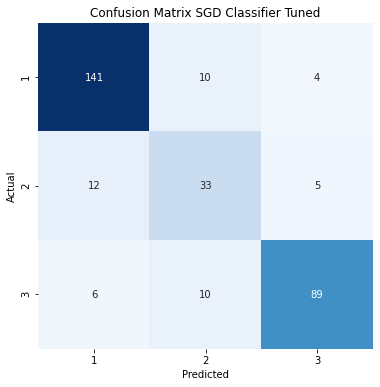

              precision    recall  f1-score   support

           1       0.89      0.91      0.90       155
           2       0.62      0.66      0.64        50
           3       0.91      0.85      0.88       105

    accuracy                           0.85       310
   macro avg       0.81      0.81      0.81       310
weighted avg       0.85      0.85      0.85       310



In [ ]:
clfb = SGDClassifier()
clfb.fit(X_train, y_train)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix((y_test), clfb.predict(X_test)), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(3) + 0.5, labels=["1", "2", "3"])
plt.yticks(ticks=np.arange(3) + 0.5, labels=["1", "2", "3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SGD Classifier Baseline")
plt.show()
print(classification_report(y_test, clfb.predict(X_test)))
            
clf = SGDClassifier(penalty='l1', loss='log', alpha=0.00015385329137865346)
clf.fit(X_train, y_train)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix((y_test), clf.predict(X_test)), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(3) + 0.5, labels=["1", "2", "3"])
plt.yticks(ticks=np.arange(3) + 0.5, labels=["1", "2", "3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SGD Classifier Tuned")
plt.show()
print(classification_report(y_test, clf.predict(X_test)))

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



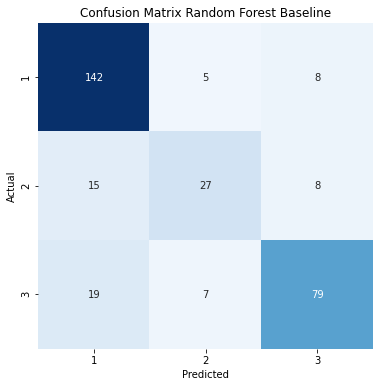

              precision    recall  f1-score   support

           1       0.80      0.92      0.85       155
           2       0.75      0.60      0.67        50
           3       0.87      0.76      0.81       105

    accuracy                           0.81       310
   macro avg       0.81      0.76      0.78       310
weighted avg       0.81      0.81      0.81       310



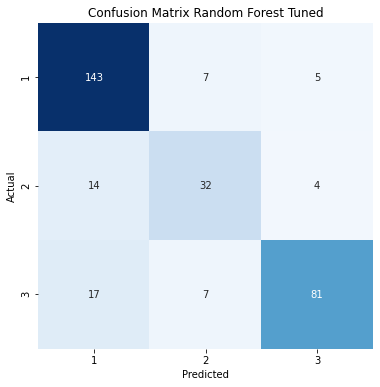

              precision    recall  f1-score   support

           1       0.82      0.92      0.87       155
           2       0.70      0.64      0.67        50
           3       0.90      0.77      0.83       105

    accuracy                           0.83       310
   macro avg       0.81      0.78      0.79       310
weighted avg       0.83      0.83      0.82       310



In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix((y_test), clf.predict(X_test)), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(3) + 0.5, labels=["1", "2", "3"])
plt.yticks(ticks=np.arange(3) + 0.5, labels=["1", "2", "3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Random Forest Baseline")
plt.show()
print(classification_report(y_test, clfb.predict(X_test)))

clfb = RandomForestClassifier(n_estimators= 191, max_depth= 86.90537259699667, criterion= 'entropy')
clfb.fit(X_train, y_train)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix((y_test), clfb.predict(X_test)), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(3) + 0.5, labels=["1", "2", "3"])
plt.yticks(ticks=np.arange(3) + 0.5, labels=["1", "2", "3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Random Forest Tuned")
plt.show()
print(classification_report(y_test, clfb.predict(X_test)))

C:\Users\Rayum Shahed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



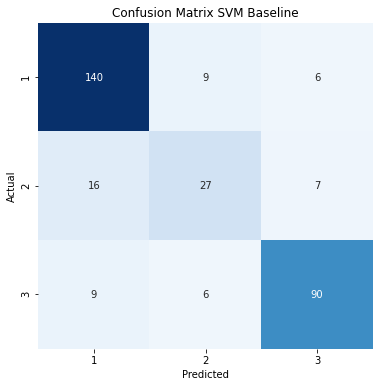

              precision    recall  f1-score   support

           1       0.85      0.90      0.88       155
           2       0.64      0.54      0.59        50
           3       0.87      0.86      0.87       105

    accuracy                           0.83       310
   macro avg       0.79      0.77      0.78       310
weighted avg       0.82      0.83      0.83       310



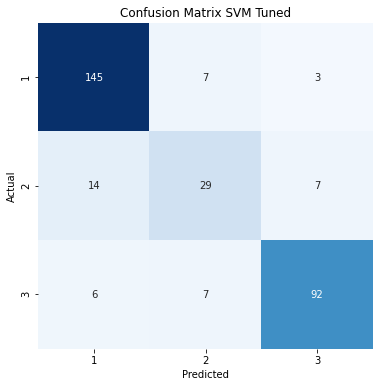

              precision    recall  f1-score   support

           1       0.88      0.94      0.91       155
           2       0.67      0.58      0.62        50
           3       0.90      0.88      0.89       105

    accuracy                           0.86       310
   macro avg       0.82      0.80      0.81       310
weighted avg       0.85      0.86      0.85       310



In [ ]:
clfa = svm.SVC()
clfa.fit(X_train, y_train)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix((y_test), clfa.predict(X_test)), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(3) + 0.5, labels=["1", "2", "3"])
plt.yticks(ticks=np.arange(3) + 0.5, labels=["1", "2", "3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVM Baseline")
plt.show()
print(classification_report(y_test, clfa.predict(X_test)))

clfb = svm.SVC(kernel= 'poly', C= 2.284649855978821, gamma= 'scale', degree= 2)
clfb.fit(X_train, y_train)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix((y_test), clfb.predict(X_test)), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(3) + 0.5, labels=["1", "2", "3"])
plt.yticks(ticks=np.arange(3) + 0.5, labels=["1", "2", "3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVM Tuned")
plt.show()
print(classification_report(y_test, clfb.predict(X_test)))